# **TechnoHacks EduTech | Data Science | Internship**

---
## **Step 1: Define the Problem Statement:**

## **Task 03 | Churn Prediction:**
 - Use a dataset of customer information and build a model that can predict which customers are most likely to leave a company.

### **DataSet:** [Churn Prediction](https://www.kaggle.com/datasets/blastchar/telco-customer-churn)

---

### **About Dataset:**
 - #### **Context:**
      "Predict behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs." [IBM Sample Data Sets]

 - #### **Content:**
     Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

 - #### **The data set includes information about:**
     - Customers who left within the last month – the column is called Churn.
     - Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies.
     - Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges.
     - Demographic info about customers – gender, age range, and if they have partners and dependents.

---
## **Step 2: Data Collection:**
   - #### **Importing Data Collection Library:**

In [42]:
# importing library
import pandas as pd

 - ### **Load the Dataset:**

In [43]:
# Load the dataset
df = pd.read_csv(r".\WA_Fn_UseC_Telco_Customer_Churn.csv")

 - #### **set options to be maximum for rows and columns:**

In [44]:
# set options to be maximum for rows and columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
# hide all warnings
import warnings
warnings.filterwarnings('ignore') 

In [45]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [46]:
# Data Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [47]:
# shape of dataset
df.shape

(7043, 21)

In [48]:
# dataset columns
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

 - #### **Summary statistics:**

In [49]:
# Summary statistics
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


## **Step 3: EDA - Data Visualization:**

   - #### **Importing the Data Visualization Libraries:**

In [50]:
# Importing the Data Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

 - #### **Distribution of churn:**

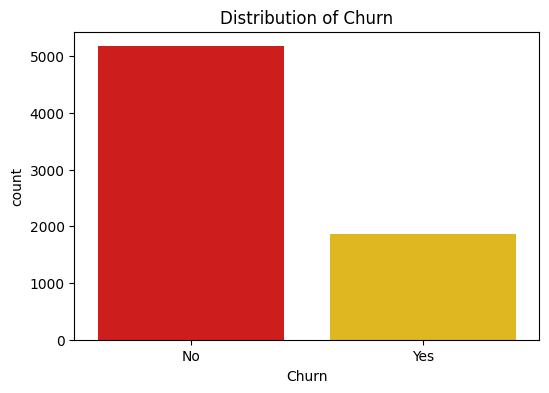

In [51]:
# Distribution of churn
plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=df, palette="hot")
plt.title('Distribution of Churn')
plt.show()

 - #### **Tenure vs. Churn:**

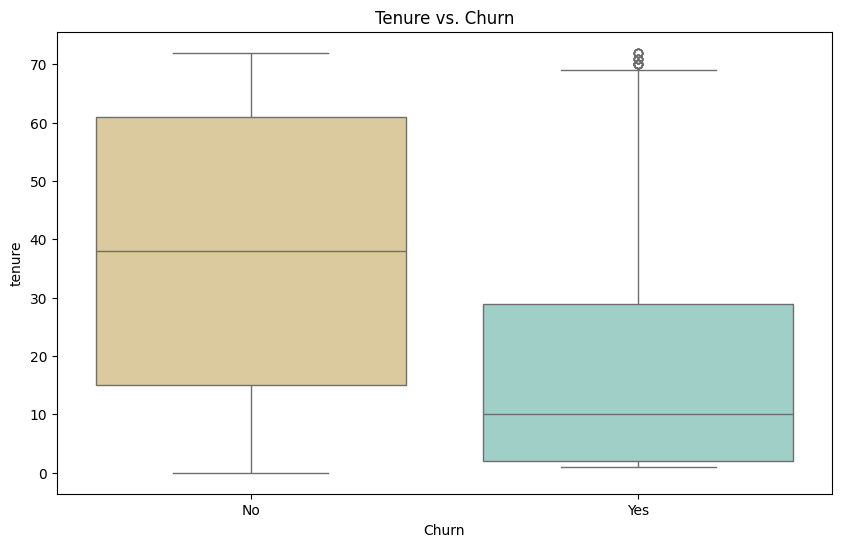

In [52]:
# Tenure vs. Churn
plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='tenure', data=df, palette="BrBG")
plt.title('Tenure vs. Churn')
plt.show()

 - #### **Monthly charges distribution:**

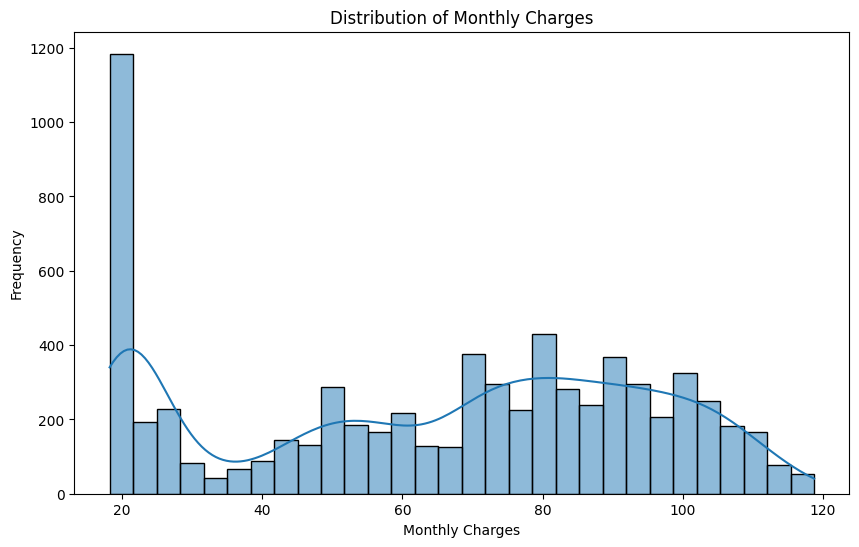

In [53]:
# Monthly charges distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['MonthlyCharges'], bins=30, kde=True)
plt.title('Distribution of Monthly Charges')
plt.xlabel('Monthly Charges')
plt.ylabel('Frequency')
plt.show()

 - #### **Churn by contract type:**

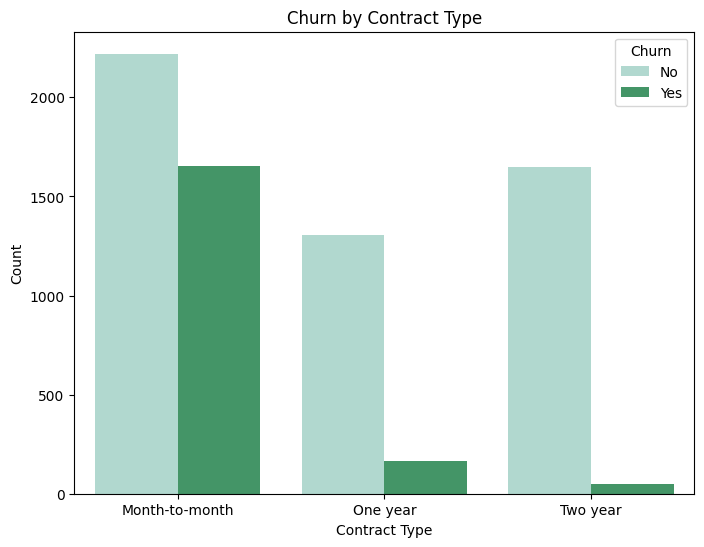

In [54]:
# Churn by contract type
plt.figure(figsize=(8, 6))
sns.countplot(x='Contract', hue='Churn', data=df, palette="BuGn")
plt.title('Churn by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.show()

 - #### **Churn by Internet Service:**

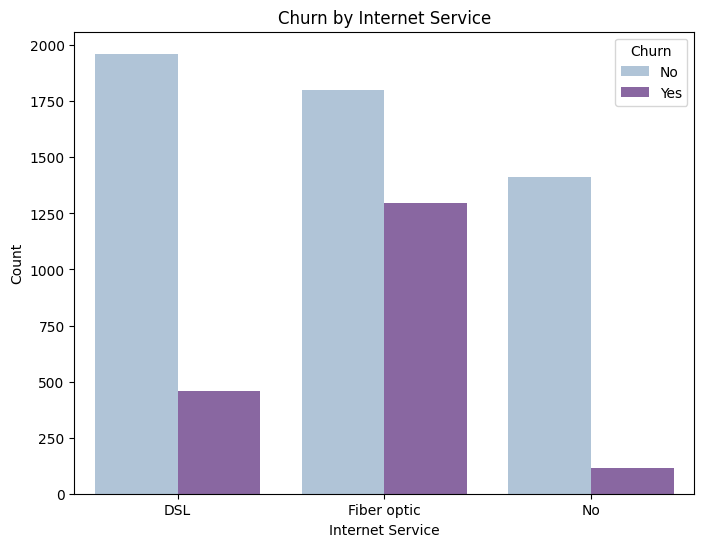

In [55]:
# Churn by internet service
plt.figure(figsize=(8, 6))
sns.countplot(x='InternetService', hue='Churn', data=df, palette='BuPu')
plt.title('Churn by Internet Service')
plt.xlabel('Internet Service')
plt.ylabel('Count')
plt.show()

 - #### **Churn by Payment Method:**

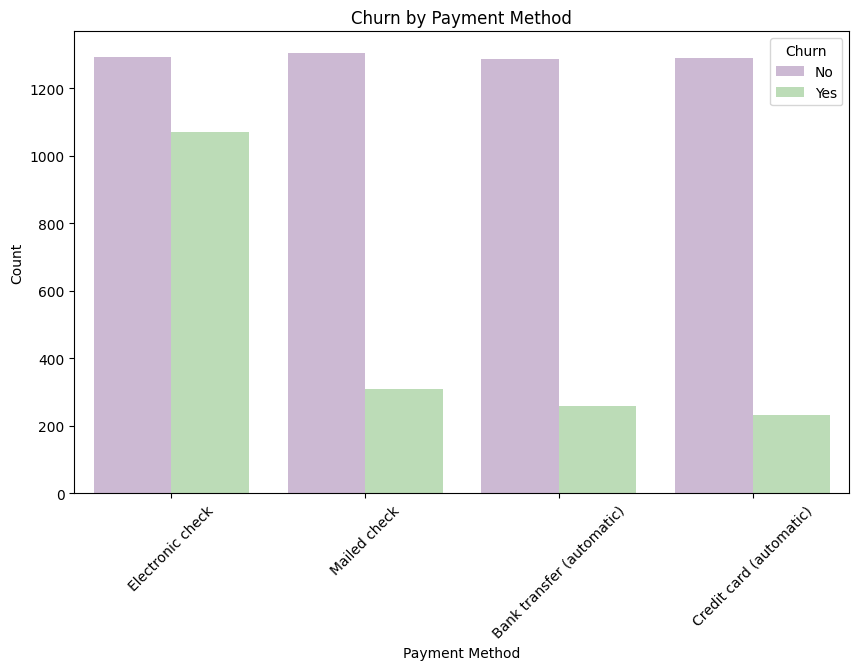

In [56]:
# Churn by payment method
plt.figure(figsize=(10, 6))
sns.countplot(x='PaymentMethod', hue='Churn', data=df, palette='PRGn')
plt.title('Churn by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

## **Step 4: Data Pre-processing:**
  - #### **Importing Data Pre-processing Libraries:**

In [57]:
# Importing Data Pre-processing Libraries
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler

 - #### **Convert TotalCharges to Numerical:**

In [58]:
# Convert TotalCharges to numerical
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

  - #### **Impute Missing Values:**

In [59]:
# Impute missing values
imputer = SimpleImputer(strategy='mean')
df['TotalCharges'] = imputer.fit_transform(df['TotalCharges'].values.reshape(-1, 1))

 - #### **Convert Categorical Variables to Numerical:**

In [60]:
# Convert categorical variables to numerical
label_encoder = LabelEncoder()
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = label_encoder.fit_transform(df[column])

## **Step 5 & 6: Choose a Model & Splitting the Data:**

In [61]:
# Step 5: Choose a Model
from sklearn.ensemble import RandomForestClassifier

# Step 6: Splitting the Data
from sklearn.model_selection import train_test_split

 - #### **Split Data into Features and Target Variable:**

In [62]:
# Split data into features and target variable
X = df.drop('Churn', axis=1)
y = df['Churn']

 - #### **Split Data into Training and Testing sets:**

In [63]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## **Step 7: Evaluating the Model:**

In [64]:
# Step 7: Evaluating the Model
from sklearn.metrics import accuracy_score, classification_report

 - #### **Train the Model:**

In [65]:
# Train the model
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

 - #### **Make Predictions:**

In [66]:
# Make predictions
y_pred = model.predict(X_test)

 - #### **Make predictions on the entire dataset:**

In [67]:
# Make predictions on the entire dataset
y_pred_all = model.predict(X)

 - #### **Count the number of customers predicted to churn:**

In [68]:
# Count the number of customers predicted to churn
num_churned = sum(y_pred_all)

print("Number of customers predicted to churn:", num_churned)

Number of customers predicted to churn: 1773


 - #### **Evaluate the Model:**

In [69]:
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.7913413768630234


In [70]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1036
           1       0.64      0.48      0.55       373

    accuracy                           0.79      1409
   macro avg       0.74      0.69      0.71      1409
weighted avg       0.78      0.79      0.78      1409

